<a href="https://colab.research.google.com/github/Ikenergy/HAMOYE_INTERN_STAGE_B_QUIZ_SOLUTIONS/blob/master/HamoyeStageBQuizSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [47]:
df_quiz = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df_quiz.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [48]:
#droppng the 'date' and 'lights' column
modified_df = df_quiz.drop(columns=['date', 'lights'])
modified_df.head

<bound method NDFrame.head of        Appliances         T1       RH_1  ...  Tdewpoint        rv1        rv2
0              60  19.890000  47.596667  ...   5.300000  13.275433  13.275433
1              60  19.890000  46.693333  ...   5.200000  18.606195  18.606195
2              50  19.890000  46.300000  ...   5.100000  28.642668  28.642668
3              50  19.890000  46.066667  ...   5.000000  45.410389  45.410389
4              60  19.890000  46.333333  ...   4.900000  10.084097  10.084097
...           ...        ...        ...  ...        ...        ...        ...
19730         100  25.566667  46.560000  ...  13.333333  43.096812  43.096812
19731          90  25.500000  46.500000  ...  13.300000  49.282940  49.282940
19732         270  25.500000  46.596667  ...  13.266667  29.199117  29.199117
19733         420  25.500000  46.990000  ...  13.233333   6.322784   6.322784
19734         430  25.500000  46.600000  ...  13.200000  34.118851  34.118851

[19735 rows x 27 columns]>

In [49]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(modified_df), columns=modified_df.columns)
#features_df = normalised_df[['T2', 'T6']]
features_df = normalised_df.drop(columns = 'Appliances')
target_variable = normalised_df['Appliances']

In [50]:
#split our dataset into the training and testing dataset.

x_train, x_test, y_train, y_test = train_test_split(features_df, target_variable, test_size=0.3, random_state=42)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
print(predicted_values)

[0.03322207 0.24411599 0.03400024 ... 0.06844707 0.10032325 0.05722198]


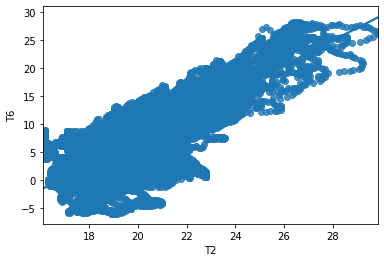

In [51]:
#regression plot
sns.regplot(x="T2", y="T6", data=modified_df)

In [52]:
#R squared
r2_score = r2_score(y_test, predicted_values)
print(round(r2_score, 2))

0.15


In [53]:
#MAE

mae = mean_absolute_error(y_test, predicted_values)
print(round(mae, 2))

0.05


In [54]:
#RSS
rss = np.sum(np.square(y_test - predicted_values))
print(round(rss, 2))

45.35


In [55]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(round(rmse, 3))

0.088


In [57]:
#R squared
r2_score = r2_score(y_test, predicted_values)
print(round(r2_score, 3))

TypeError: ignored

In [59]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [60]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [61]:
#Ridge regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(round(rmse, 3))

0.088


In [63]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [66]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(round(rmse, 3))

0.088
